## SQL and Data Exploration


Import necessary libraries

In [197]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
from IPython import display
from scipy import stats


Create connection to the database, create cursor, check table names, and column names.

In [198]:
conn = sqlite3.connect('data/im.db')

In [199]:
cur = conn.cursor()

In [200]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")

In [201]:
# display.Image('movie_data_erd.jpeg')

In [202]:
table_names = pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type = "table";



""",conn)

In [203]:
table_names

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [204]:
#conn.close()

In [205]:
movie_basics = """
SELECT *
FROM movie_basics

"""

directors = """
SELECT *
FROM directors

"""

known_for = """
SELECT *
FROM known_for

"""


movie_akas = """
SELECT *
FROM movie_akas

"""


movie_ratings = """
SELECT *
FROM movie_ratings

"""



persons = """
SELECT *
FROM persons

"""


principals = """
SELECT *
FROM principals

"""


writers = """
SELECT *
FROM writers

"""


In [206]:
df_movie_basics = pd.read_sql(movie_basics,conn)

In [207]:
df_directors = pd.read_sql(directors,conn)

In [208]:
df_known_for = pd.read_sql(known_for,conn)

In [209]:
df_movie_akas = pd.read_sql(movie_akas,conn)

In [210]:
df_movie_ratings = pd.read_sql(movie_ratings,conn)

In [211]:
df_persons = pd.read_sql(persons,conn)

In [212]:
df_principals = pd.read_sql(principals,conn)

In [213]:
df_writers = pd.read_sql(writers,conn)

In [214]:
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [215]:
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [216]:
df_known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [217]:
df_movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [218]:
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [219]:
df_persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [220]:
df_principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [221]:
df_writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [222]:
df_movie_basics.shape

(146144, 6)

In [223]:
df_movie_ratings.shape

(73856, 3)

In [224]:
df_movie_akas.shape

(331703, 8)

In [225]:
df_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


# Analyzing if there is a relationship between directors and movie rating

Join 4 tables: persons, directors,movie_basics, movie_ratings

In [226]:
df_persons.shape

(606648, 5)

In [227]:
Dir_Movie_ratings_DF = pd.read_sql(
"""
SELECT
DISTINCT per.person_id, per.primary_name, dir.movie_id,  mb.primary_title, mr.averagerating

FROM persons AS per
LEFT JOIN directors AS dir
    ON per.person_id = dir.person_id
LEFT JOIN movie_basics AS mb
    ON dir.movie_id = mb.movie_id
JOIN movie_ratings AS mr
    ON mb.movie_id = mr.movie_id


""",conn)

now this dataframe has all info from persons, directors, movie_basics, and movie ratings

In [228]:
Dir_Movie_ratings_DF.shape

(86030, 5)

In [229]:
Dir_Movie_ratings_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86030 entries, 0 to 86029
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      86030 non-null  object 
 1   primary_name   86030 non-null  object 
 2   movie_id       86030 non-null  object 
 3   primary_title  86030 non-null  object 
 4   averagerating  86030 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.3+ MB


In [230]:
Dir_Movie_ratings_DF.head()

,person_id,primary_name,movie_id,primary_title,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,Paano na kaya,6.4
1,nm0062879,Ruel S. Bayani,tt2057445,No Other Woman,6.4
2,nm0062879,Ruel S. Bayani,tt2590280,One More Try,5.8
3,nm0062879,Ruel S. Bayani,tt8421806,Kasal,7.9
4,nm0064023,Bryan Beasley,tt4512140,Not Such a Bad Guy: Conversations with Dabney ...,8.9


In [231]:
Dir_Movie_ratings_DF['Movie_Counts'] = 1

In [232]:
Dir_Movie_ratings_DF.head()

,person_id,primary_name,movie_id,primary_title,averagerating,Movie_Counts
0,nm0062879,Ruel S. Bayani,tt1592569,Paano na kaya,6.4,1
1,nm0062879,Ruel S. Bayani,tt2057445,No Other Woman,6.4,1
2,nm0062879,Ruel S. Bayani,tt2590280,One More Try,5.8,1
3,nm0062879,Ruel S. Bayani,tt8421806,Kasal,7.9,1
4,nm0064023,Bryan Beasley,tt4512140,Not Such a Bad Guy: Conversations with Dabney ...,8.9,1


In [233]:
Dir_vs_averagerating = Dir_Movie_ratings_DF[['primary_name','averagerating']].groupby('primary_name').agg(['median'])

In [234]:
Dir_vs_averagerating.head()

,averagerating
,median
primary_name,
A Normale Jef,7.2
A'Ali de Sousa,4.2
A. Blaine Miller,7.0
A. Cengiz Mert,3.2
A. Fishman,7.8


In [235]:
Dir_vs_averagerating = Dir_vs_averagerating.reset_index()

In [236]:
Dir_Movie_ratings_DF.head()

,person_id,primary_name,movie_id,primary_title,averagerating,Movie_Counts
0,nm0062879,Ruel S. Bayani,tt1592569,Paano na kaya,6.4,1
1,nm0062879,Ruel S. Bayani,tt2057445,No Other Woman,6.4,1
2,nm0062879,Ruel S. Bayani,tt2590280,One More Try,5.8,1
3,nm0062879,Ruel S. Bayani,tt8421806,Kasal,7.9,1
4,nm0064023,Bryan Beasley,tt4512140,Not Such a Bad Guy: Conversations with Dabney ...,8.9,1


In [237]:
director_vs_moviecounts = Dir_Movie_ratings_DF.groupby('primary_name').sum().sort_values(by='Movie_Counts', ascending=False)

In [238]:
director_vs_moviecounts.head()

,averagerating,Movie_Counts
primary_name,,
Sergey A.,290.2,39
Nayato Fio Nuala,174.4,37
Larry Rosen,251.8,34
Dustin Ferguson,124.1,31
Jason Impey,166.3,30


In [239]:
DF1 = pd.merge(director_vs_moviecounts,Dir_vs_averagerating, on = "primary_name")

c:\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [240]:
DF1.head()

,primary_name,averagerating,Movie_Counts,"(averagerating, median)"
0,Sergey A.,290.2,39,7.50
1,Nayato Fio Nuala,174.4,37,4.80
2,Larry Rosen,251.8,34,8.05
3,Dustin Ferguson,124.1,31,3.60
4,Jason Impey,166.3,30,5.60


In [241]:
DF1.describe()

,averagerating,Movie_Counts,"(averagerating, median)"
count,56742.000000,56742.000000,56742.000000
mean,9.612629,1.516161,6.438708
std,7.910691,1.291611,1.424472
min,1.000000,1.000000,1.000000
25%,6.100000,1.000000,5.600000
50%,7.300000,1.000000,6.600000
75%,9.800000,2.000000,7.400000
max,290.200000,39.000000,10.000000


In [242]:
del DF1['averagerating']

In [243]:
DF1.columns

Index(['primary_name', 'Movie_Counts', ('averagerating', 'median')], dtype='object')

In [244]:
DF1.head()

,primary_name,Movie_Counts,"(averagerating, median)"
0,Sergey A.,39,7.50
1,Nayato Fio Nuala,37,4.80
2,Larry Rosen,34,8.05
3,Dustin Ferguson,31,3.60
4,Jason Impey,30,5.60


<AxesSubplot:ylabel='Movie_Counts'>

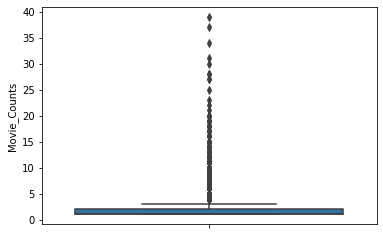

In [245]:
sns.boxplot(data = DF1, y='Movie_Counts', x= None, width=0.8)  

<AxesSubplot:ylabel='Movie_Counts'>

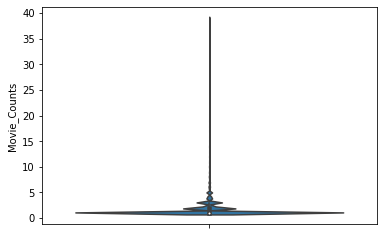

In [246]:
sns.violinplot(data=DF1, y="Movie_Counts")

In [247]:
DF1.Movie_Counts.median()

1.0

<AxesSubplot:xlabel='Movie_Counts', ylabel='Count'>

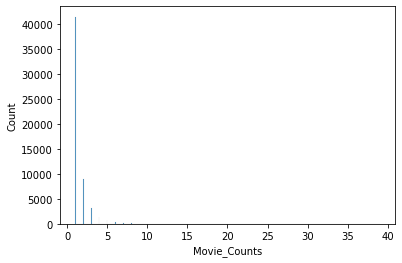

In [248]:
sns.histplot(data=DF1, x="Movie_Counts")

Conclusion: Looks like the median movie counts for most of the directors is 1. There are some outliers greater than 10??

Drop the outliers, do I have to normalize this distribution or make it normal in order to remove the outliers?

# Is there correlation between movie ratings and director movie made counts?

In [249]:
DF1.columns

Index(['primary_name', 'Movie_Counts', ('averagerating', 'median')], dtype='object')

In [250]:
# using Pearson's coefficent to see if there is correlation between number of movies per directer and ratings.
np.corrcoef(DF1['Movie_Counts'],DF1[('averagerating', 'median')] )


array([[ 1.        , -0.07377526],
       [-0.07377526,  1.        ]])


There is barely any correlation between the number of movies a director made to the movie ratings.
Therefore not pursuing this route.

In [251]:
# DF1.to_csv('Data_created/Director_Movie_counts_and_Rating.csv')

# Looking into correlation between return or profit $$ and rating:

In [252]:
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [253]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [254]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [263]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [269]:
# Convert strings to int for production_budget, domestic_budget, and worldwide_gross
# movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace("$","").str.replace(",","").astype(int)
# movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace("$","").str.replace(",","").astype(int)
# movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace("$","").str.replace(",","").astype(int)

# Remove the $ and , from the columns production_budget, domestic_gross, and worldwide_gross
# movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace("$","").str.replace(",","")
# movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace("$","").str.replace(",","")
# movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace("$","").str.replace(",","")

# # # COnvert the columns production_budget, domestic_gross, and worldwide_gross to numeric
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'])
# movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'])
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'])

In [265]:
# create a new column for return percentage = (worldwide_gross - production_budget) / worldwide_gross * 100%

In [270]:
movie_budgets['return_percentage'] = (movie_budgets['worldwide_gross'] - movie_budgets['production_budget'])/movie_budgets['production_budget']

In [271]:
movie_budgets['return_percentage'].max()


1799.0

In [272]:
movie_budgets['return_percentage'].min()

-1.0

(array([5.595e+03, 1.000e+02, 3.100e+01, 1.700e+01, 7.000e+00, 7.000e+00,
        8.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

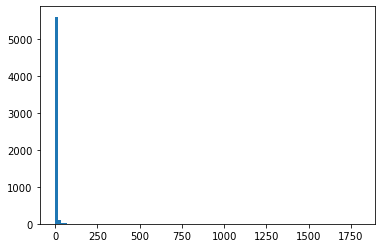

In [273]:
# Maybe now you can do a distribution plot
plt.hist(x= movie_budgets['return_percentage'], bins = 100)

In [274]:
movie_budgets['return_percentage'].describe()

count    5782.000000
mean        3.800161
std        29.530282
min        -1.000000
25%        -0.507704
50%         0.708310
75%         2.758346
max      1799.000000
Name: return_percentage, dtype: float64

The distribution is right-skewed, relatively more low values than high values.
 Looking into data points that are greater than median. Reason: Taking out the ones below median return percentage to investigate what other features they have, genres, and ratings...

In [275]:
movie_return_percent_above_median = movie_budgets[movie_budgets['return_percentage'] > movie_budgets['return_percentage'].median() ]
movie_return_percent_above_median

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_percentage
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,5.710167
...,...,...,...,...,...,...,...
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,290.704000
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,119.275143
5775,76,"May 26, 2006",Cavite,7000,70071,71644,9.234857
5778,79,"Apr 2, 1999",Following,6000,48482,240495,39.082500


<AxesSubplot:xlabel='return_percentage', ylabel='Count'>

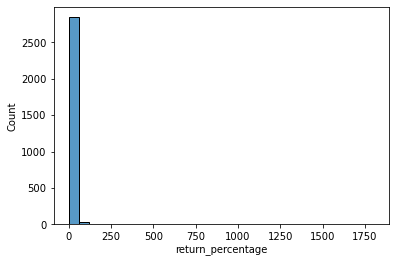

In [276]:
sns.histplot(x= 'return_percentage', data= movie_return_percent_above_median, bins= 30 )

Compare the movies' return percentages with movie ratings, to see if there is a correlation, or linear relationship.
I am going to merge 2 tablese togetheer, one with return percentages and one with average rating for each movie.

In [277]:
movie_return_percent_above_median.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'return_percentage'],
      dtype='object')

In [278]:
Dir_Movie_ratings_DF.head()

,person_id,primary_name,movie_id,primary_title,averagerating,Movie_Counts
0,nm0062879,Ruel S. Bayani,tt1592569,Paano na kaya,6.4,1
1,nm0062879,Ruel S. Bayani,tt2057445,No Other Woman,6.4,1
2,nm0062879,Ruel S. Bayani,tt2590280,One More Try,5.8,1
3,nm0062879,Ruel S. Bayani,tt8421806,Kasal,7.9,1
4,nm0064023,Bryan Beasley,tt4512140,Not Such a Bad Guy: Conversations with Dabney ...,8.9,1


In [279]:
DF2 = pd.merge(movie_return_percent_above_median, Dir_Movie_ratings_DF, left_on='movie', right_on='primary_title')

In [280]:
DF2 = DF2.drop(['primary_title','movie_id','production_budget','domestic_gross','worldwide_gross'], axis = 1)

merged_df has has movies with return percentages > median, and average rating per movie in the database. Matched on movie titles.

Apply pearson correlation coefficient to see any correlation between return percentages and rating.

In [281]:
np.corrcoef( DF2['return_percentage'], DF2['averagerating'])

array([[ 1.        , -0.06095312],
       [-0.06095312,  1.        ]])

Pearson correlation coefficient is -0.06 between return and ratings. Seems like there is no correlation between return and rating.